In [1]:
# Notebook'u yayınladığım site bu işi bilim adına gönüllü olarak yapıyor. 

# Henüz hesap ve dosya erişim sistemini oluşturmadılar.

# Diğerlerininde faydalanmasını sağlamak için lütfen notebook'u 

# Sadece Çalıştırın Değiştirmeyin

# Düzenlemek İçin File -> Make a Copy yolunu kullanarak notebook'u klonlayabilirsiniz


    Tensorflow C++ da yazıdı bu yüzden pythondaki verileri doğrudan kütüphanede kullanamıyoruz.
    Verileri kullanabilmek için tensorflowun bize sunduğu veri yapılarını kullanmamız gerekiyor.

    - Variable() değişkenleri
    - constant() sabit değerleri
    - placeholder() geçici olarak değer tutan veri yapılarını temsil ediyor

    Bu veri yapılarında çeşitli boyutlardaki matrisleri tutabiliriz. 
    Veri türü olarak python listelerini, numpy dizilerini veya tensorflow dizilerini kullanabiliriz.
    Ayrıca istersek tanımladığımız veri yapılarını adlandırabiliriz. Tensorflow öntanımlı olarak 32 bit float
    veriler ile işlemler yapıyor.

    Kullanımı:
        v = tf.Variable(matris, name="isim")
        p = tf.placeholder(matris, name="isim")
        c = tf.constant(matris, name="isim")



    Yapay Sinir Hucresi:
$$Sinyal = AktivasyonFonksiyonu({AgirlikMatrisi * Girdi + SapmaDegeri})$$

    Agirlik matrisleri (weights) yapay sinir aglarindaki hafizayi temsil ediyor.
    Yapay Sinir Aginda bu matrisleri, gelen veriler ve sonrasinda kullandigimiz optimizasyon algoritmasi
    ile sekillendiriyoruz. Yapay sinir agi boyle ogreniyor.

  
    
    

      Agirlik matrisini sadece girdilerle sekillendirerek aktivasyon fonksiyonunu esnek bir sekilde kullanmayiz. 
      Aktivasyon fonksiyonlarından biri olan sigmoid fonksiyonunun biassız ve bias eklenmiş grafiklerini
      inceleyelim.
$$ sigmoid: y = 1/(1+e^{-x}) $$

![](neuron_1.gif)![](sigmoid_1.png) ![](neuron_2.gif) ![](sigmoid_2.png)
    
    Aktivasyon fonksiyonu yapay sinir hucresinin urettigi sinyalin gucune gore hucrenin aktif olup olmayacagini
    veya ne olcude aktif olacagini belirler.
    sigmoid, tanh, step bu fonksiyonlara örnek verilebilir 

    Yapay zekanın ogrenmesini saglamak icin tahmin edilen veriler ile dogru verileri kıyaslayıp,
    aralarındaki kaybi(hatayi) hesaplayip azaltmamiz gerekiyor
    
    Bu hatayi hesaplamak icin;
        loss = tf.reduce_mean(tf.square(y_pred - y_real))    

    islemini kullanıyoruz. Burada oncelikle iki deger arasindaki farkı hesapladık. 
    Ardindan belirginlestirmek icin farkin karesini aldik. Son olarak da reduce_mean() 
    fonksiyonu ile kaybin ortalama degerini olctuk. Bu fonksiyon parametre olarak 
    input_tensor (giris matrisini) aliyor. Ek olarak hangi boyuta gore ortalama alinacagi
    belirlenebiliyor.

    Bu hatayi optimizasyon algoritmalari ile azaltabiliriz. Tensorflow bize hazir kullanabilecegimiz 
    bazi optimizasyon algoritmalari sunuyor. Biz bunlar arasindan GradientDescentOptimizer'i kullanacagiz.
![](gdo.png)

    Bu algoritma N boyutlu hata matrisinde minumum noktayi bulmayi hedefliyor.
    Bu algoritmayi;
        optimizer = tf.train.GradientDescentOptimizer(0.5)
    seklinde kullanabiliriz. Girdigimiz 0.5 degeri ogrenme oranini temsil ediyor. 
    Bu degeri cok yuksek yaparsak minumum noktayi es gecebiliriz, cok kucuk yaparsak da
    minimum noktaya ulasmamiz cok uzun surebilir. 
    
    Tensorflow "lazy" calisiyor yani tanimladigimiz degiskenler, fonsiyonlar, optimizasyon algoritmalari 
    tanimladigimiz anda calistirilmiyor. Bu islemleri aktif etmek icin tensorflow oturumu (Session) kullanmamiz
    gerekiyor. Session'u bir isaretci olarak dusunulebilir. Tanimladigimiz yapay sinir agi modelinin istedigimiz
    adimini Session ile calistirip degerini alabiliriz.

    Asagida en basit haliyle bir yapay sinir agi olusturduk. Giris verileri icin (X) -1 ile 1 arasinda rastgele sayilardan olusan 3x3 bir matris olusturduk.
    Gercek verileri temsil etmek icinde giris verilerinde biraz oynama yaptik. Bu ornekteki amacimiz giris matrisini(X) ile yapay sinir agini egiterek her adimda
    gercek degerlere(y_real) biraz daha yaklasmak. 


In [2]:
import numpy as np
import tensorflow as tf

In [3]:
# Rastgele veriler oluşturduk
X = np.random.rand(3, 3).astype(np.float32)
y_real = X * 0.1 + 0.3
print(y_real)

[[ 0.30501819  0.37679443  0.39487767]
 [ 0.32714039  0.36743698  0.32770458]
 [ 0.38853815  0.38401783  0.38375115]]


In [4]:
weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # 1D array,  [-0.322323, 0.612312, ... , 0.712342]
biases = tf.Variable(tf.zeros([1])) # [0]

In [5]:
y_pred = weights * X + biases # giris verilerine gore bir tahmin olustur (sinir hucresi)

In [6]:
loss = tf.reduce_mean(tf.square(y_pred - y_real)) # kaybi hesapla

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.5) # learning_rate < 1
train = optimizer.minimize(loss) # modeli optimize et

    Eğer Variable() tanımlamışsak tensorflowun  bu değişkenleri tanıması için 
    tf.global_variables_initializer() fonksiyonunu çalıştırmamız gerekiyor.

In [8]:
init = tf.global_variables_initializer() # important, degiskenleri tanimla

    Eğitimin her aşamasında modelin tahmit ettiği değerlerin asıl değerlere yaklaşmasını umuyoruz

In [9]:
# Train
sess = tf.Session() # pointer
sess.run(init) # degiskenler tanimlandi
for step in range(1000):
    sess.run(train) # Modeli 1 kez egittik. train -> optimizer -> loss -> (y_pred, y_real) -> Wx_plus_B -> W, X, B

    if step % 200 is 0: # 200 adimda bir
        # agirlik matrisini ve sapma degerini yazdirdik. (Amacimiz  y_pred'in, y_real'e yaklasmasi)
        print(step, sess.run(weights), sess.run(biases)) 

0 [ 0.02979365] [ 0.60090828]
200 [ 0.09999987] [ 0.3000001]
400 [ 0.09999988] [ 0.3000001]
600 [ 0.09999988] [ 0.3000001]
800 [ 0.09999988] [ 0.3000001]


In [10]:
prediction = sess.run(y_pred) # Modelden verileri almak için run metodunu bir değişkene atıyoruz
print(prediction, end="\n\n")
print(y_real)

[[ 0.30501825  0.3767944   0.39487764]
 [ 0.32714045  0.36743701  0.32770464]
 [ 0.38853812  0.38401783  0.38375115]]

[[ 0.30501819  0.37679443  0.39487767]
 [ 0.32714039  0.36743698  0.32770458]
 [ 0.38853815  0.38401783  0.38375115]]


In [ ]:
# %load ders_2.py
"""
Data types
"""

import numpy as np
import tensorflow as tf







In [4]:
import tensorflow as tf

In [7]:
matrix_1 = tf.constant([[3, 3, 5], [1, 2, 3]])
matrix_2 = tf.constant([[3, 2], [3, 5], [7, 1]])

result = tf.matmul(matrix_1, matrix_2)

sess = tf.Session()
sonuc = sess.run(result)
print(sonuc)


[[53 26]
 [30 15]]


In [8]:
state = tf.Variable(0, name="counter") # baslangic degeri, isim
print(state.name)

one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.global_variables_initializer() # degisken varsa calistirilmali

sess.run(init)
for _ in range(5):
    sess.run(update)
    print(sess.run(state))

counter:0
1
2
3
4
5


In [9]:

input_1 = tf.placeholder(tf.float32) # type, shape
input_2 = tf.placeholder(tf.float32)

output = tf.multiply(input_1, input_2)

In [11]:
for step in range(1000):
    res = sess.run(output, feed_dict={input_1:[4.], input_2:[7.]})

print(res)

[ 28.]


In [21]:
# %load ders_3.py
"""
Convolutional layers
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

def add_layer(inputs, in_size, out_size, activation_func=None):
    """
        Creates hidden layers
    """
    weights = tf.Variable(tf.random_normal([in_size, out_size])) # initialize all variables as 0.1
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_plus_b = tf.matmul(inputs, weights) + biases

    if activation_func:
        return activation_func(wx_plus_b)
    return wx_plus_b

In [24]:
# Create some data
X = np.linspace(-1, 1, 300)[:, np.newaxis] # add 1D to sample
noise = np.random.normal(0, 0.05, X.shape).astype(np.float32) # add some noise so it's looks real
# y = x^2
Y = np.square(X) - 0.5 + noise

# plot the data
#plt.scatter(X, Y)
#plt.show()

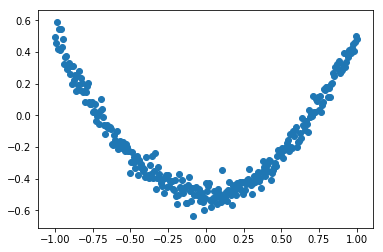

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y)

In [26]:




# Define inputs (placeholders)
xs = tf.placeholder(tf.float32, [None, 1]) # n samples, n futures
ys = tf.placeholder(tf.float32, [None, 1])

# Add hidden layer
l1 = add_layer(xs, 1, 10, activation_func=tf.nn.relu) # data, future size, hidden neuron, actv_fnc

# Add output layer
prediction = add_layer(l1, 10, 1, activation_func=None) # data, future size, expectation size, actv_fnc

# Calculate errors
# calculate the square errors (difference between real and predicted values) and sum all of them


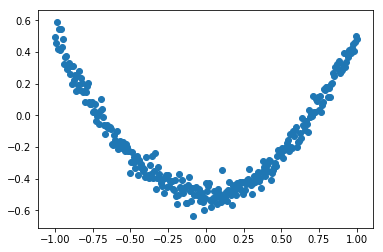

In [27]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

# Train
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y)
plt.ion()
plt.show()
for i in range(1000):
    # egitim sart
    sess.run(train_step, feed_dict = {xs:X, ys:Y})
    
    if i % 50 == 0:
        # loss is based on ys and prediction and prediction is based on xs 
        #print(sess.run(loss, feed_dict = {xs:X, ys:Y}))
        
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass

        prediction_value = sess.run(prediction, feed_dict={xs:X})    
        # plot
        lines = ax.plot(X, prediction_value, 'r', lw=5)
        plt.pause(0.01)
